In [30]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.formula.api import ols  
from statsmodels.stats.anova import anova_lm,_get_covariance
%matplotlib inline

In [3]:
mu=5
sigma=1.5
stats.norm.cdf(3.17,loc=mu,scale=sigma)


0.11123243744783456

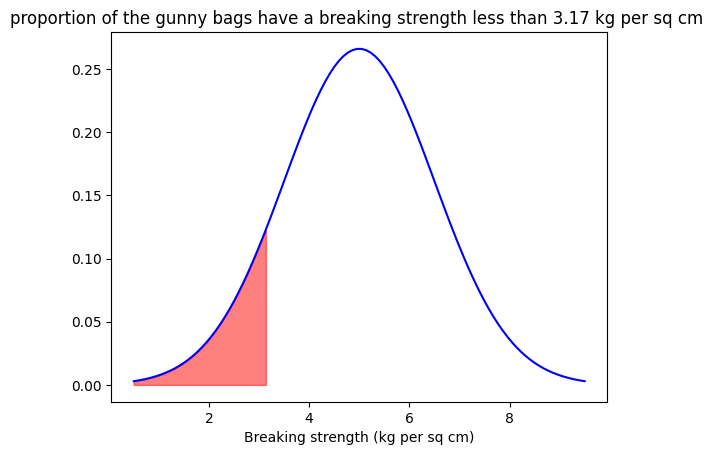

In [4]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf, where=x <3.17, color='red', alpha=0.5)
plt.xlabel('Breaking strength (kg per sq cm)')
plt.title('proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm ')
plt.show()

In [5]:
1-stats.norm.cdf(3.6,loc=mu,scale=sigma)

0.8246760551477705

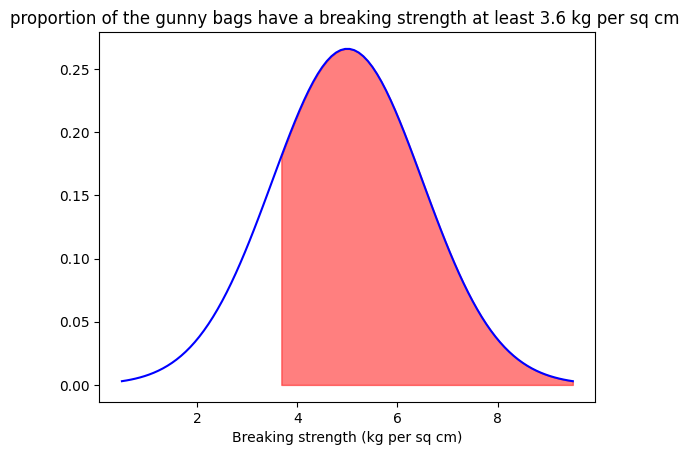

In [6]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf, where=x >=3.6, color='red', alpha=0.5)
plt.xlabel('Breaking strength (kg per sq cm)')
plt.title('proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm ')
plt.show()

In [7]:
cdf_5 = stats.norm.cdf(5, mu, sigma)
cdf_5_5 = stats.norm.cdf(5.5, mu, sigma)
proportion = cdf_5_5 - cdf_5
proportion

0.13055865981823633

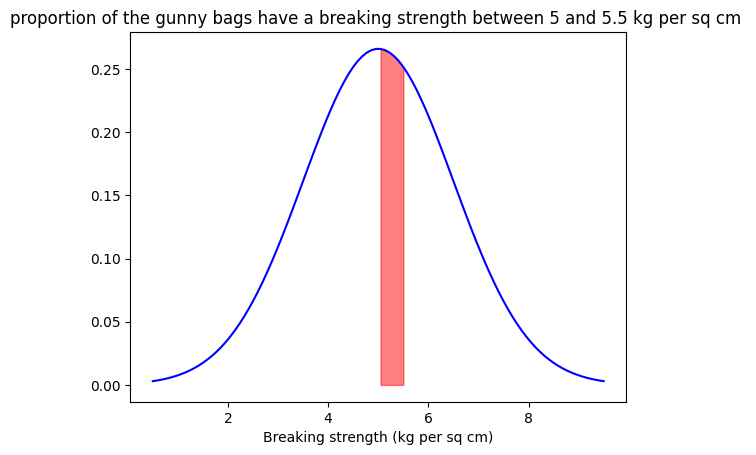

In [8]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf, where=((x >= 5) & (x <= 5.5)), color='red', alpha=0.5)
plt.xlabel('Breaking strength (kg per sq cm)')
plt.title('proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm ')
plt.show()

In [9]:
cdf_3 = stats.norm.cdf(3, mu, sigma)
cdf_7_5 = stats.norm.cdf(7.5, mu, sigma)
proportion = cdf_3 + (1-cdf_7_5)
proportion

0.13900157199868257

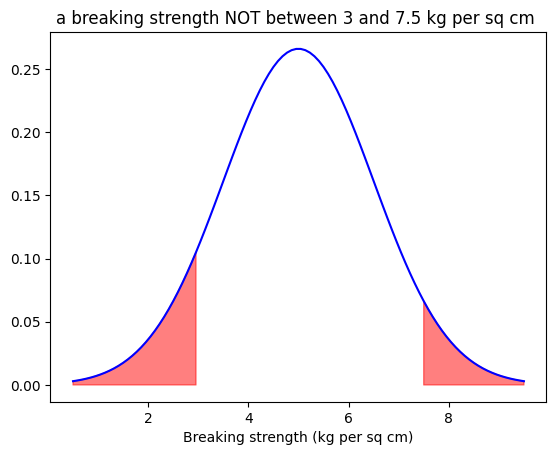

In [10]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf,where=((x <= 3) | (x >= 7.5)) , color='red', alpha=0.5)
plt.xlabel('Breaking strength (kg per sq cm)')
plt.title('a breaking strength NOT between 3 and 7.5 kg per sq cm ')
plt.show()

In [11]:
df3=pd.read_csv("Zingaro_Company.csv")
df3

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227
...,...,...
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530


In [12]:
df3.count()
from scipy.stats import ttest_1samp

df3.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


In [13]:
# 3.1 
# Define the null and alternate hypotheses 
# Null hypothesis (H0): The mean hardness of unpolished stones is equal to 150.
# Alternate hypothesis (H1): The mean hardness of unpolished stones is not equal to 150.

# Set the significance level (alpha)
alpha_value = 0.05

# Perform a one-sample t-test for unpolished stones
t_statistic, p_value = ttest_1samp(df3['Unpolished '], 150)

# Output the results
print("One-sample t-test for unpolished stones:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check if the p-value is less than the significance level
if p_value < alpha_value:
    print("We have evidence to reject the null hypothesis.")
    print("Zingaro may be justified in thinking that unpolished stones are not suitable for printing.")
else:
    print("We have no evidence to reject the null hypothesis.")
    print("Zingaro's belief is not supported by the data.")

# Additional information
print("Our one-sample t-test p-value =", p_value)

One-sample t-test for unpolished stones:
t-statistic: -4.164629601426757
p-value: 8.342573994839304e-05
We have evidence to reject the null hypothesis.
Zingaro may be justified in thinking that unpolished stones are not suitable for printing.
Our one-sample t-test p-value = 8.342573994839304e-05


In [14]:
# 3.2 Define the null and alternate hypotheses
# Null hypothesis (H0): The mean hardness of polished and unpolished stones is equal.
# Alternate hypothesis (H1): The mean hardness of polished and unpolished stones is not equal.

# Set the significance level (alpha)
alpha_value = 0.05

# Perform a two-sample t-test to compare the means of polished and unpolished stones
from scipy.stats import ttest_ind

# Separate the data into polished and unpolished groups
polished_stones = df3['Treated and Polished']
unpolished_stones = df3['Unpolished ']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(polished_stones, unpolished_stones, equal_var=False)

# Output the results
print("Two-sample t-test for polished and unpolished stones:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check if the p-value is less than the significance level
if p_value < alpha_value:
    print("We have evidence to reject the null hypothesis.")
    print("The mean hardness of polished and unpolished stones is not the same.")
else:
    print("We have no evidence to reject the null hypothesis.")
    print("The data does not provide sufficient evidence to conclude that the means are different.")

# Additional information
print("Our two-sample t-test p-value =", p_value)


Two-sample t-test for polished and unpolished stones:
t-statistic: 3.242232050141406
p-value: 0.0015883792955843057
We have evidence to reject the null hypothesis.
The mean hardness of polished and unpolished stones is not the same.
Our two-sample t-test p-value = 0.0015883792955843057


In [18]:
DF=pd.read_excel('Dental+Hardness+Data.xlsx')

In [24]:
DF.Dentist=pd.Categorical(DF.Dentist)
DF.Method=pd.Categorical(DF.Method)
DF.Alloy=pd.Categorical(DF.Alloy)
alloy_1 = DF[DF['Alloy'] == 1]
alloy_2 = DF[DF['Alloy'] == 2]
# Assumption 1 : Normality test by Shapiro-Wilk's test
w, p_value = stats.shapiro(alloy_1['Response'])
print('The p-Value for alloy type 1 is', p_value)
# Since, p -value is very low, hence, null hypothesis is rejected which means repsonse does not follow normal distribution for alloy1
# Assumption 1 : Normality test by Shapiro-Wilk's test
w, p_value = stats.shapiro(alloy_2['Response'])
print('The p-Value for alloy type 2 is', p_value)
# Since, p -value is very low, hence, null hypothesis is rejected which means repsonse does not follow normal distribution for alloy2


The p-Value for alloy type 1 is 1.1945070582441986e-05
The p-Value for alloy type 2 is 0.00040293222991749644


In [25]:
# Assumption 2
# Check the equality of variances
statistics, p_value = stats.levene(alloy_1['Response'][alloy_1['Dentist']==1],
                            alloy_1['Response'][alloy_1['Dentist']==2],
                            alloy_1['Response'][alloy_1['Dentist']==3],
                            alloy_1['Response'][alloy_1['Dentist']==4],
                            alloy_1['Response'][alloy_1['Dentist']==5])
print('The p-Value for test of equal variance for alloy1 is', p_value)
# Since, p-value>0.05, assumption of variances homogenity holds true.

The p-Value for test of equal variance for alloy1 is 0.2565537418543793


In [26]:
# Assumption 2
# Check the equality of variances
statistics, p_value = stats.levene(alloy_2['Response'][alloy_2['Dentist']==1],
                            alloy_2['Response'][alloy_2['Dentist']==2],
                            alloy_2['Response'][alloy_2['Dentist']==3],
                            alloy_2['Response'][alloy_2['Dentist']==4],
                            alloy_2['Response'][alloy_2['Dentist']==5])
print('The p-Value for test of equal variance for alloy2 is', p_value)
# Since, p-value>0.05, assumption of variances homogenity holds true.

The p-Value for test of equal variance for alloy2 is 0.23686777576324947


In [ ]:
# Define the null and alternate hypotheses for Problem 4.1
# Null hypothesis (H0): The hardness of implants is the same for all dentists.
# Alternate hypothesis (H1): The hardness of implants varies depending on dentists.

# Separate the data based on the 'Method' column
method1_data = df4[df4['Method'] == 1]['Response']
method2_data = df4[df4['Method'] == 2]['Response']

# Perform a two-sample t-test to compare the means of the two methods
t_statistic, p_value = stats.ttest_ind(method1_data, method2_data)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to make a decision
if p_value < alpha:
    print("We have evidence to reject the null hypothesis.")
    print("The mean hardness of implants varies depending on methods.")
else:
    print("We have no evidence to reject the null hypothesis.")
    print("The mean hardness of implants is not significantly different based on methods.")

# Display the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

In [31]:
Formula='Response~C(Dentist)'
model=ols(Formula,alloy_1).fit()
aov_table=anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


In [32]:
Formula='Response~C(Dentist)'
model=ols(Formula,alloy_2).fit()
aov_table=anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


In [33]:
# 4.2
## Assumption 2 - Homogenity of Varinace

statistics, p_value = stats.levene(alloy_1['Response'][alloy_1['Method']==1],
                            alloy_1['Response'][alloy_1['Method']==2],
                            alloy_1['Response'][alloy_1['Method']==3])

print('The p-Value for alloy1 is', p_value)

# Since, Since, p-value<0.05, assumption of variances homogenity does not hold true.

The p-Value for alloy1 is 0.003416038146023399


In [34]:
# 4.2
## Assumption 1 - Homogenity of Varinace

statistics, p_value = stats.levene(alloy_2['Response'][alloy_2['Method']==1],
                            alloy_2['Response'][alloy_2['Method']==2],
                            alloy_2['Response'][alloy_2['Method']==3])

print('The p-Value for alloy2 is', p_value)

# Since, p-value<0.05, assumption of variances homogenity does not hold true.

The p-Value for alloy2 is 0.04469269939158666


In [35]:
Formula='Response~C(Method)'
model=ols(Formula,alloy_1).fit()
aov_table=anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


In [36]:
Formula='Response~C(Method)'
model=ols(Formula,alloy_2).fit()
aov_table=anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog = alloy_1['Response'],groups = alloy_1['Method'],alpha =0.05)

print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   1.0    2.0   -6.1333  0.987  -102.714  90.4473  False
   1.0    3.0    -124.8 0.0085 -221.3807 -28.2193   True
   2.0    3.0 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog = alloy_2['Response'],groups = alloy_2['Method'],alpha =0.05)

print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
   1.0    2.0     27.0 0.8212  -82.4546  136.4546  False
   1.0    3.0   -208.8 0.0001 -318.2546  -99.3454   True
   2.0    3.0   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


<Axes: xlabel='Method', ylabel='Response'>

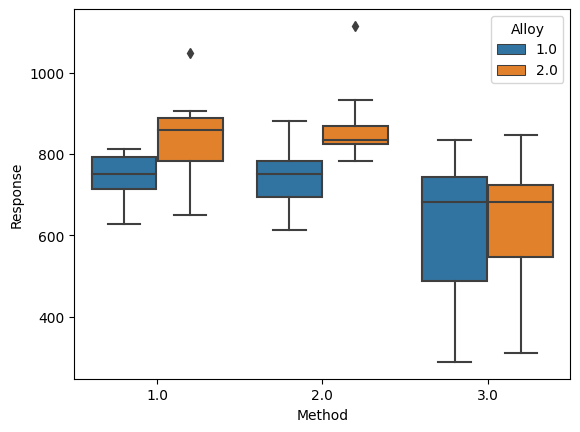

In [39]:
sns.boxplot(x='Method', y='Response', data=DF, hue='Alloy')

<Axes: xlabel='Method', ylabel='Response'>

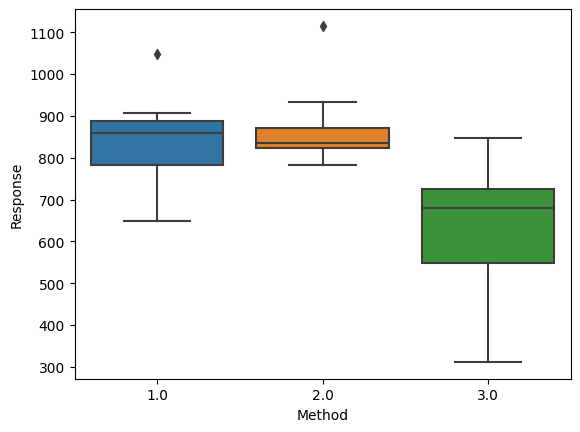

In [40]:
sns.boxplot(x='Method', y='Response', data=alloy_2)

In [41]:
#4.3 - Study of interaction effect of different levels of method & dentists
Formula='Response ~ C(Dentist) + C(Method) + C(Dentist)*C(Method)'
model=ols(Formula,alloy_1).fit()
aov_table=anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


C:\Users\ANUJ SALWAN\AppData\Local\Temp\ipykernel_284\2165109955.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(x=alloy_1['Dentist'], y=alloy_1['Response'], hue = alloy_1['Method'], ci=False);


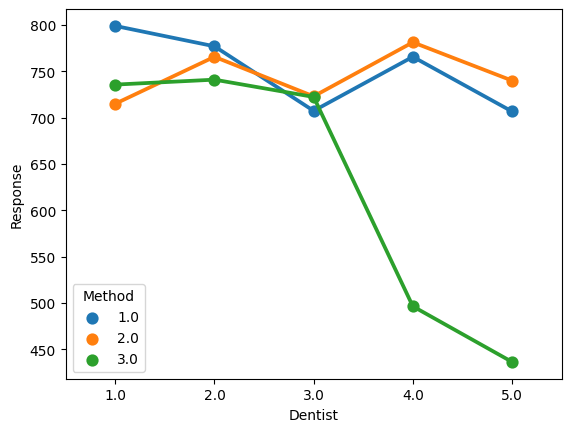

In [42]:
sns.pointplot(x=alloy_1['Dentist'], y=alloy_1['Response'], hue = alloy_1['Method'], ci=False);

In [43]:
#4.3 - Study of interaction effect of different levels of method & dentists
Formula='Response ~ C(Dentist) + C(Method) + C(Dentist)*C(Method)'
model=ols(Formula,alloy_2).fit()
aov_table=anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


C:\Users\ANUJ SALWAN\AppData\Local\Temp\ipykernel_284\94000272.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(x=alloy_2['Dentist'], y=alloy_2['Response'], hue = alloy_2['Method'], ci=False);


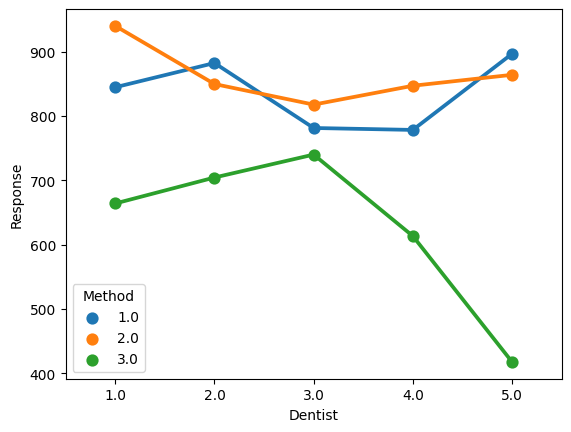

In [44]:
sns.pointplot(x=alloy_2['Dentist'], y=alloy_2['Response'], hue = alloy_2['Method'], ci=False);

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog = alloy_1['Response'],groups = alloy_1['Method'],alpha =0.05)

print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   1.0    2.0   -6.1333  0.987  -102.714  90.4473  False
   1.0    3.0    -124.8 0.0085 -221.3807 -28.2193   True
   2.0    3.0 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog = alloy_1['Response'],groups = alloy_2['Method'],alpha =0.05)

print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   1.0    2.0   -6.1333  0.987  -102.714  90.4473  False
   1.0    3.0    -124.8 0.0085 -221.3807 -28.2193   True
   2.0    3.0 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


<Axes: xlabel='Dentist', ylabel='Response'>

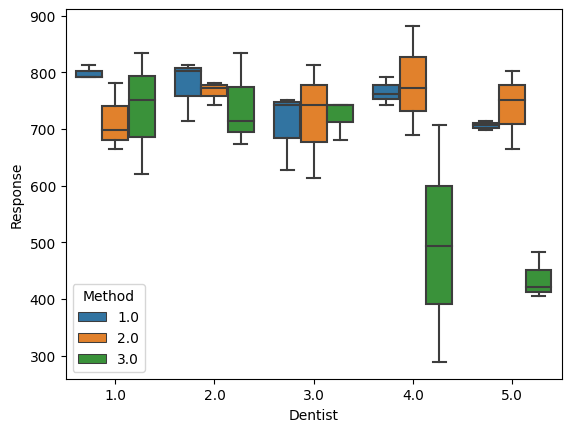

In [47]:
sns.boxplot(x='Dentist', y='Response',hue='Method', data=alloy_1)

<Axes: xlabel='Dentist', ylabel='Response'>

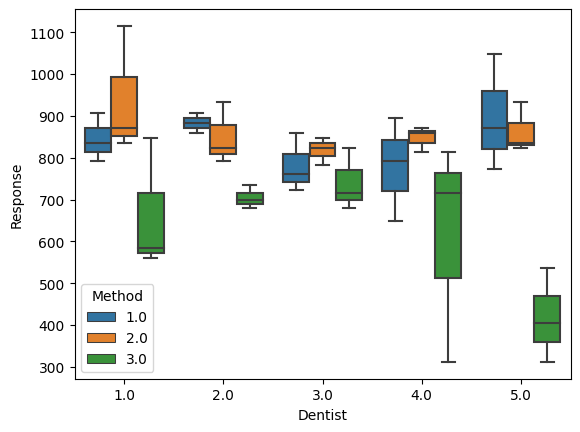

In [50]:
sns.boxplot(x='Dentist', y='Response',hue='Method', data=alloy_2)